###ANSWER
(for making sure this gets removed)

### INSTRUCTOR CONTENT -- REMOVE THIS IN STUDENT VERSION
#### The goals this PCA are:

* Prompt them to prepare to give/create a project update.
* Introduce students to Principle Component Analysis and get them to think a little bit about how this might help with feature reduction and improving separability of classes.
* **Added at some point...**: Introduce students to the idea of scaling data before performing modeling or analysis

# Pre-Class Assignment: Principal Component Analysis
# Day 23
# CMSE 202

## <p style="text-align: right;"> &#9989; Put your name here</p>

## Goals for today's pre-class assignment 

1. Introduction to Principal Component Analysis
2. Example Application: The Breast Cancer dataset
3. Understanding the importance of scaling data

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class** and should be uploaded into the appropriate "Pre-class assignments" submission folder in the Desire2Learn website. 

----
#### Importing modules
Run the following cell to import the modules we will be using in this pre-class assignment.

In [3]:
import numpy as np
import sklearn.decomposition as dec
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_context("notebook")

---

## 1. Developing some intuition about principal component analysis

The following videos (developed at Georgia Tech) are to help you gain an understanding and intuition about principal component analysis (PCA). PCA is one of the main techniques used in data science, exploratory data analysis and modeling.

You can watch the entire course here:

https://youtu.be/Ki2iHgKxRBo?list=PLAwxTw4SYaPl0N6-e1GvyLp5-MUMUjOKo

It's a great video series but we don't have time to cover it all.

&#9989; **Do This:** Watch the following video for an overview of PCA (don't worry about any references to "readings" from their course).

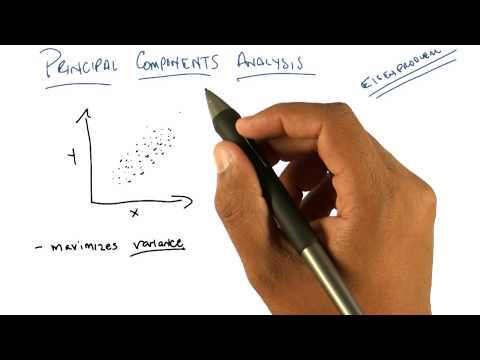

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("kw9R0nD69OU",width=640,height=360)

&#9989; **Question**: PCA is trying to find the directions with maximal what? 

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

&#9989; **Question**: What does it mean when two components are orthogonal?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

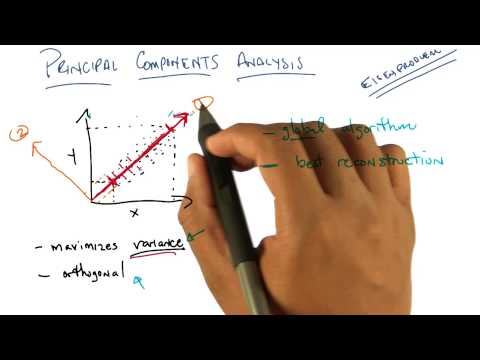

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo("_nZUhV-qhZA",width=640,height=360)

&#9989; **Question**: This video introduces a concept of "features" in a dataset. What are the names of the two original features represented in the graph shown in this video? What parts of the graph would represent the new features after the PCA is performed? 

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

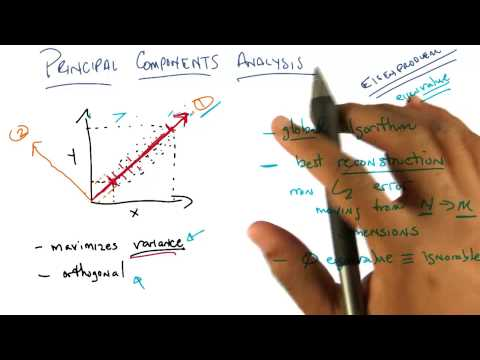

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo("kuzJJgPBrqc",width=640,height=360)

&#9989; **Question**: What does it mean if eigenvalue of a dimension is zero? How might performing PCA allow one to reduce the number of features we need to model to our data to get accurate results when making predictions?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

---

## 2. Example Application: The Breast Cancer Dataset

Let's go back to the Breast Cancer dataset from a previous assignment. We'll need to download the dataset, which you can do using the following URL:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/WIBreastCancer_Cleaned.csv`

Remember: this is **real data**, corresponding to **real people**, with **real diseases.** It can be easy to forget this when working with data for the purposes of learning how to use new modeling and data analysis tools. You should always strive to see the human aspect of whatever you are working on when working with data.

&#9989; **Question: Use Pandas to load the breast cancer dataset.**

In [ ]:
# Load the dataset using Pandas

In [13]:
### ANSWER

# !curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/WIBreastCancer_Cleaned.csv

df = pd.read_csv("WIBreastCancer_Cleaned.csv")
df

,clump,Norm-Nuc,C-shape,adhesion,Epi-size,Bare-Nuc,chromatin,C-size,mitoses,label
0,5,1,1,1,2,1,3,1,1,0
1,5,2,4,5,7,10,3,4,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,7,8,1,3,4,3,8,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,6,6,4,3,4,10,8,1,1


### Step A: Try to visualize the features by plotting them.

&#9989; **Question**: Modify the following code to draw a scatterplot of the data for just the first and second axes of the data matrix (index 0 and 1). **Note**: since the data features have integer values, you may want to add a small amount of random noise to the data to make it easier to see the overlapping data points or make the points transparent (e.g alpha=0.25) -- or both!

In [ ]:
# DO THIS: Modify the code below to do a scatter plot with respect to the first two variables of the data
# i.e. all rows but just the first and second columns.

#plt.scatter(  ,   , c=target, s=30, cmap=plt.cm.rainbow);

# Don't forget to add axis labels


Text(0, 0.5, 'Norm-Nuc')

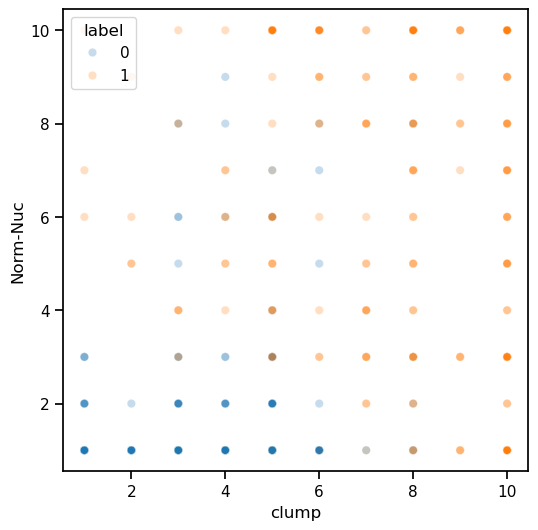

In [15]:
### ANSWER ###
plt.figure(figsize=(6,6))
sns.scatterplot(x='clump',y='Norm-Nuc', data=df, hue="label", alpha=0.25)
plt.xlabel("clump")
plt.ylabel("Norm-Nuc")


Text(0, 0.5, 'Norm-Nuc')

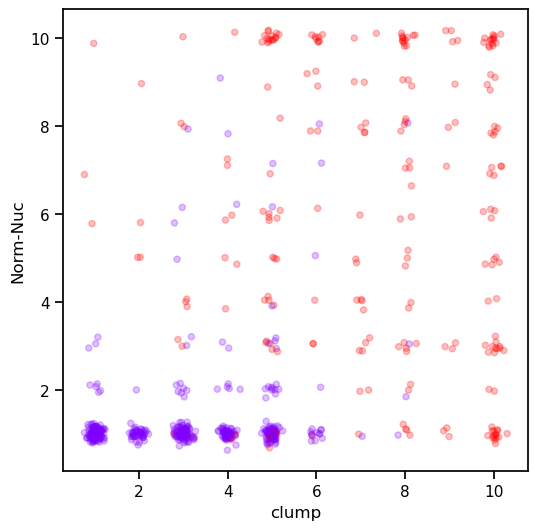

In [17]:
### ANSWER
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:,0]+np.random.normal(0.0,0.1,size=len(df)), df.iloc[:,1]+np.random.normal(0.0,0.1,size=len(df)), c=df["label"], s=20, cmap=plt.cm.rainbow, alpha=0.25)
plt.xlabel("clump")
plt.ylabel("Norm-Nuc")


If done correctly the above should show different color dots for each of the malignant and benign tumors.  As you can see, the classes do not separate clearly as two of the classes have a significant amount of overlap. Perhaps there are two new directions (axes) that separate the data better?

### Step B: Transform the data in terms of its principal components
Now we will use a PCA algorithm. Fortunately there is a simple PCA function available in the `scikit-learn` module [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

In [19]:
#Note: make sure that your dataframe is called df

pca = dec.PCA()
pca_data = pca.fit_transform(df.drop(columns=["label"]))

Out of curiosity, let's print the eigenvalues. The eigenvalues are stored in the **attribute** `explained_variance`. Remember from the video that low eigenvalues indicate less information. Big eigenvalues indicate more information. However, the eigenvalues are just numbers and do not indicate much so let's print also their ratio.

In [21]:
print("The eigenvalues are: ", pca.explained_variance_)
print("Their ratios are: ", pca.explained_variance_ratio_)

The eigenvalues are:  [48.60201413  5.24222919  4.28575413  3.10203207  2.73418265  2.45440012
  1.77671606  1.59392599  0.80367251]
Their ratios are:  [0.68846327 0.07425787 0.0607091  0.04394129 0.03873058 0.03476737
 0.02516776 0.02257848 0.01138428]


As you can see the last few eigenvalues are pretty small and do not provide much information. 

However, these eigenvalues do not tell us which is the most important feature in the dataset. Principal Component Analysis is a global algorithm that "rotates" the data into new dimensions. 
Mathematically speaking the components are the eigenvectors. Let's print the components and check that they are orthogonal

In [23]:
for i, eigv in zip(["first", "second", "third", "fourth"], pca.components_):
    print(f"The elements of the {i} eigenvector are: ", eigv) 

The elements of the first eigenvector are:  [0.29819499 0.35618966 0.39182959 0.33137834 0.24985997 0.44128662
 0.29184301 0.4040269  0.12366355]
The elements of the second eigenvector are:  [ 0.05766947 -0.47402649 -0.16810879  0.09479829 -0.1812882   0.79035527
 -0.01969062 -0.22810718 -0.15741143]
The elements of the third eigenvector are:  [ 0.84870182 -0.13400002  0.07511076 -0.48294017 -0.04989646 -0.08249455
 -0.10797409  0.02498576 -0.03603711]
The elements of the fourth eigenvector are:  [-0.06573366  0.74886113 -0.20040805 -0.3989845  -0.19438837  0.30328274
  0.04167154 -0.28498937 -0.15103431]


&#9989; **Do this:** Write some code to check that all the eigenvectors are orthogonal to each other. **Hint:** The dot product of two orthogonal vectors is zero (or numerically close to zero).

In [ ]:
# Put your code here

In [27]:
### ANSWER
for i, eigv1 in enumerate(pca.components_):
    for j, eigv2 in enumerate(pca.components_[i + 1:,], i + 1):
        print(f"The dot product between the {i}th and {j}th eigenvectors is: {np.dot(eigv1, eigv2):.4e}")

The dot product between the 0th and 1th eigenvectors is: 2.9143e-16
The dot product between the 0th and 2th eigenvectors is: 1.9429e-16
The dot product between the 0th and 3th eigenvectors is: -3.3307e-16
The dot product between the 0th and 4th eigenvectors is: 1.2490e-16
The dot product between the 0th and 5th eigenvectors is: -2.0817e-17
The dot product between the 0th and 6th eigenvectors is: 5.5511e-17
The dot product between the 0th and 7th eigenvectors is: 3.4694e-17
The dot product between the 0th and 8th eigenvectors is: 0.0000e+00
The dot product between the 1th and 2th eigenvectors is: -4.7184e-16
The dot product between the 1th and 3th eigenvectors is: 4.1633e-17
The dot product between the 1th and 4th eigenvectors is: 1.6653e-16
The dot product between the 1th and 5th eigenvectors is: 5.5511e-17
The dot product between the 1th and 6th eigenvectors is: -4.1633e-17
The dot product between the 1th and 7th eigenvectors is: -1.3357e-16
The dot product between the 1th and 8th eig

### Step C: Now plot the transformed data in terms of its first two principal components

Text(0, 0.5, 'PCA Component 2')

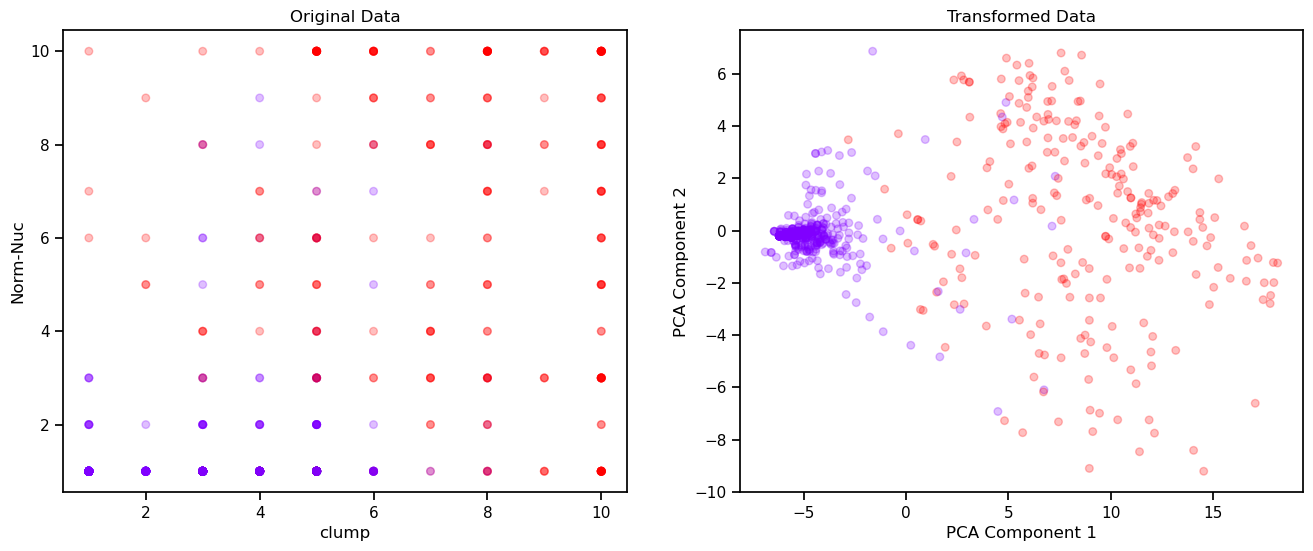

In [29]:
fig, ax = plt.subplots(1,2, figsize = (16, 6))
# Plot the original data

ax[0].scatter(df.iloc[:,0], df.iloc[:,1], c=df["label"], s=30, cmap=plt.cm.rainbow, alpha=0.25)
ax[0].set_title("Original Data")
ax[0].set_xlabel("clump")
ax[0].set_ylabel("Norm-Nuc")

# Plot the transformed data
ax[1].scatter(pca_data[:,0], pca_data[:,1], c=df["label"], s=30, cmap=plt.cm.rainbow, alpha=0.25)
ax[1].set_title("Transformed Data")
ax[1].set_xlabel("PCA Component 1")
ax[1].set_ylabel("PCA Component 2")

&#9989; **Question:**  Describe in words the differences between the above graphs. They are representing the same data. Why might we prefer to use the features produced by Step C?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

---
## 3. Scaling Data


As mentioned above PCA finds the dimensions with the highest variance. However, it can be the case that some of the features in your dataset lie on very different ranges. For example, think of a dataset containing the salaries and heights of all the people in a company. The range of salaries is much wider than the range of heights, e.g. from less than 15 USD/hour for the clerk to Millions of USD for the CEO while the heights of employees changes only over several inches. 

&#9989; **Do this:** Read the guides below


**Why scale?** For many machine learning algorithms, like k-NN or K-means, scaling your data can improve performance and uniformity. For the PCA algorithm, it relies heavily on the variance of features, and unscaled data can mislead the PCA results.

Read this article to understand more about feature scaling:
[Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

**What kind of scalars are there?** However not all scalars are created equal and we must use different scalars to handle different datasets.

Read up to section 6.3.1.3 to learn about the different scalars you can use: [Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) 

**How do different scalars deal with outliers?** As previously mentioned, there are different types of scalars and they all scale data for certain situations. One common reason to scale is for outliers.

Read this article to understand how the different scaling types works with outliers: [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py) 


&#9989; **Now do this** Answer the following questions

1. Why is it important to scale data?

2. What scaler is used in the first article?

3. How many linear scalers can you find in `scikit-learn`? List all the ones you find.

4. How do you pre-process the data when it has outliers? What scaler do you use and why?

5. List at least two non-linear transformers?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

---
## Follow-up Questions

Copy and paste the following questions into the appropriate box in the assignment survey include below and answer them there. (Note: You'll have to fill out the assignment number and go to the "NEXT" section of the survey to paste in these questions.)

1. When doing a principle component analysis (PCA), the goal is to find a new set of axes that maximize what?

2. When you perform PCA, what do large eigenvalues indicate versus small eigenvalues?

3. Why is important to scale data? 

4. How do you deal with outliers?

----
# Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your name in the first cell).

&#169; Copyright 2025 Department of Computational Mathematics, Science and Engineering at Michigan State University